# Notebook

In [1]:
import pandas as pd # pip install pandas
import numpy as np

# Rendering
%matplotlib inline
import matplotlib # pip install matplotlib
import matplotlib.pyplot as plt

import plotly # pip install plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import folium # pip install folium
from folium import plugins

import ipywidgets as widgets
from datetime import datetime
from IPython.display import display

## Parameters

In [21]:
root = "../"
data_folder = root + "trip_data/"
fare_folder = root + "trip_fare/"
data_file = data_folder + "trip_data_1.csv"
fare_file = fare_folder + "trip_fare_1.csv"

nrows = 10000

## Loaded and cleaned

In [22]:
types={'hack_license': str, 'hack_license': str, 'pickup_datetime': str}
indexes = ['medallion', 'hack_license', 'vendor_id', 'pickup_datetime']
data = pd.read_csv(data_file, nrows=nrows, dtype=types, parse_dates=["pickup_datetime", "dropoff_datetime"]).rename(columns=lambda x: x.strip()).set_index(indexes)
fare = pd.read_csv(fare_file, nrows=nrows, dtype=types, parse_dates=[" pickup_datetime"]).rename(columns=lambda x: x.strip()).set_index(indexes)


In [23]:
print(data.index.is_unique)
print(fare.index.is_unique)

True
True


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (89D227B655E5C82AECF13C3F540D4CF4, BA96DE419E711691B9445D6A6307C170, CMT, 2013-01-01 15:11:48) to (8B7DB5F212307EF40A4B805302DF77F5, DE6C6303882CDA1592A2E95DE0EA80DE, VTS, 2013-01-13 10:55:00)
Data columns (total 10 columns):
rate_code             10000 non-null int64
store_and_fwd_flag    171 non-null object
dropoff_datetime      10000 non-null datetime64[ns]
passenger_count       10000 non-null int64
trip_time_in_secs     10000 non-null int64
trip_distance         10000 non-null float64
pickup_longitude      10000 non-null float64
pickup_latitude       10000 non-null float64
dropoff_longitude     10000 non-null float64
dropoff_latitude      10000 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 1.2+ MB


In [25]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (89D227B655E5C82AECF13C3F540D4CF4, BA96DE419E711691B9445D6A6307C170, CMT, 2013-01-01 15:11:48) to (8B7DB5F212307EF40A4B805302DF77F5, DE6C6303882CDA1592A2E95DE0EA80DE, VTS, 2013-01-13 10:55:00)
Data columns (total 7 columns):
payment_type    10000 non-null object
fare_amount     10000 non-null float64
surcharge       10000 non-null float64
mta_tax         10000 non-null float64
tip_amount      10000 non-null float64
tolls_amount    10000 non-null float64
total_amount    10000 non-null float64
dtypes: float64(6), object(1)
memory usage: 1018.6+ KB


In [26]:
duplicates = "hack_license"
full = data.join(fare, how="inner", lsuffix="_left", rsuffix="_right")

In [27]:
for i, v in enumerate(indexes):
    full[v] = full.index.get_level_values(v)

In [28]:
full.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (89D227B655E5C82AECF13C3F540D4CF4, BA96DE419E711691B9445D6A6307C170, CMT, 2013-01-01 15:11:48) to (8B7DB5F212307EF40A4B805302DF77F5, DE6C6303882CDA1592A2E95DE0EA80DE, VTS, 2013-01-13 10:55:00)
Data columns (total 21 columns):
rate_code             10000 non-null int64
store_and_fwd_flag    171 non-null object
dropoff_datetime      10000 non-null datetime64[ns]
passenger_count       10000 non-null int64
trip_time_in_secs     10000 non-null int64
trip_distance         10000 non-null float64
pickup_longitude      10000 non-null float64
pickup_latitude       10000 non-null float64
dropoff_longitude     10000 non-null float64
dropoff_latitude      10000 non-null float64
payment_type          10000 non-null object
fare_amount           10000 non-null float64
surcharge             10000 non-null float64
mta_tax               10000 non-null float64
tip_amount            10000 non-null float64
tolls_amount          10000 non-null 

In [29]:
full.head()

rate_code  \
medallion                        hack_license                     vendor_id pickup_datetime                  
89D227B655E5C82AECF13C3F540D4CF4 BA96DE419E711691B9445D6A6307C170 CMT       2013-01-01 15:11:48          1   
0BD7C8F5BA12B88E0B67BED28BEA73D8 9FD8F69F0804BDB5549F40E9DA1BE472 CMT       2013-01-06 00:18:35          1   
                                                                            2013-01-05 18:49:41          1   
DFD2202EE08F7A8DC9A57B02ACB81FE2 51EE87E3205C985EF8431D850C786310 CMT       2013-01-07 23:54:15          1   
                                                                            2013-01-07 23:25:03          1   

                                                                                                store_and_fwd_flag  \
medallion                        hack_license                     vendor_id pickup_datetime                          
89D227B655E5C82AECF13C3F540D4CF4 BA96DE419E711691B9445D6A6307C170 CMT       2013-01-01 15:11:48                  N   
0BD7C8F5BA12B88E0B67BED28BEA73D8 9FD8F69F0804BDB5549F40E9DA1BE472 CMT       2013-01-06 00:18:35                  N   
                                                                            2013-01-05 18:49:41                  N   
DFD2202EE08F7A8DC9A57B02ACB81FE2 51EE87E3205C985EF8431D850C786310 CMT       2013-01-07 23:54:15                  N   
                                                                            2013-01-07 23:25:03                  N   

                                                                                                   dropoff_datetime  \
medallion                        hack_license                     vendor_id pickup_datetime                           
89D227B655E5C82AECF13C3F540D4CF4 BA96DE419E711691B9445D6A6307C170 CMT       2013-01-01 15:11:48 2013-01-01 15:18:10   
0BD7C8F5BA12B88E0B67BED28BEA73D8 9FD8F69F0804BDB5549F40E9DA1BE472 CMT       2013-01-06 00:18:35 2013-01-06 00:22:54   
                                                                            2013-01-05 18:49:41 2013-01-05 18:54:23   
DFD2202EE08F7A8DC9A57B02ACB81FE2 51EE87E3205C985EF8431D850C786310 CMT       2013-01-07 23:54:15 2013-01-07 23:58:20   
                                                                            2013-01-07 23:25:03 2013-01-07 23:34:24   

                                                                                                 passenger_count  \
medallion                        hack_license                     vendor_id pickup_datetime                        
89D227B655E5C82AECF13C3F540D4CF4 BA96DE419E711691B9445D6A6307C170 CMT       2013-01-01 15:11:48                4   
0BD7C8F5BA12B88E0B67BED28BEA73D8 9FD8F69F0804BDB5549F40E9DA1BE472 CMT       2013-01-06 00:18:35                1   
                                                                            2013-01-05 18:49:41                1   
DFD2202EE08F7A8DC9A57B02ACB81FE2 51EE87E3205C985EF8431D850C786310 CMT       2013-01-07 23:54:15                2   
                                                                            2013-01-07 23:25:03                1   

                                                                                                 trip_time_in_secs  \
medallion                        hack_license                     vendor_id pickup_datetime                          
89D227B655E5C82AECF13C3F540D4CF4 BA96DE419E711691B9445D6A6307C170 CMT       2013-01-01 15:11:48                382   
0BD7C8F5BA12B88E0B67BED28BEA73D8 9FD8F69F0804BDB5549F40E9DA1BE472 CMT       2013-01-06 00:18:35                259   
                                                                            2013-01-05 18:49:41                282   
DFD2202EE08F7A8DC9A57B02ACB81FE2 51EE87E3205C985EF8431D850C786310 CMT       2013-01-07 23:54:15                244   
                                                                            2013-01-07 23:25:03                560   

                         

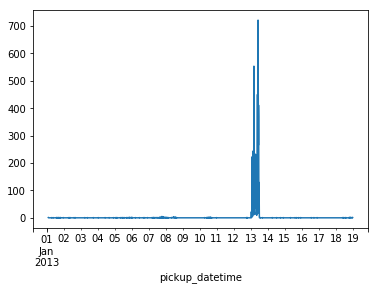

In [30]:
test = full.reset_index(drop=True).set_index(["pickup_datetime"])#groupby(full["pickup_datetime"])#.count()["total_amount"].plot(kind="bar")
test.resample('10T').count()["total_amount"].plot()

In [31]:
full["total_amount"].groupby(full["pickup_datetime"].dt.day)

In [32]:
hour_sample = test["total_amount"].resample('H').count()
hour_sample = (hour_sample - hour_sample.mean()) / hour_sample.mean()
minute_sample = test["total_amount"].resample('10T').count()
minute_sample = (minute_sample - minute_sample.mean()) / minute_sample.mean()

hour_sample_amount = test["total_amount"].resample('H').sum()
hour_sample_amount = (hour_sample_amount - hour_sample_amount.mean()) / hour_sample_amount.mean()
minute_sample_amount = test["total_amount"].resample('10T').sum()
minute_sample_amount = (minute_sample_amount - minute_sample_amount.mean()) / minute_sample_amount.mean()

In [33]:
def plot_time_series(low, high):
    trace_high = go.Scatter(
    x=high.index,
    y=high,
    name = "10 minutes resampling",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

    trace_low = go.Scatter(
        x=low.index,
        y=low,
        name = "1 hour resampling",
        line = dict(color = '#7F7F7F'),
        opacity = 0.8)

    data = [trace_high,trace_low]

    layout = dict(
        title='Time Series with Rangeslider',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='day',
                         step='day',
                         stepmode='backward'),
                    dict(count=7,
                         label='week',
                         step='day',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
    )

    fig = dict(data=data, layout=layout)
    plotly.offline.iplot(fig, filename = "Time Series")

In [34]:
plot_time_series(minute_sample, hour_sample)

In [35]:
plot_time_series(minute_sample_amount, hour_sample_amount)

In [36]:
plot_time_series(minute_sample, minute_sample_amount)

In [37]:
start_date = datetime(2013, 1, 1)
end_date = datetime(2013, 1, 31)

dates = pd.date_range(start_date, end_date, freq='H')

options = [(date.strftime(' %d %b %Y %Hh'), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '800px'}
)

selection_range_slider

SelectionRangeSlider(description='Dates', index=(0, 720), layout=Layout(width='800px'), options=((' 01 Jan 201…

In [38]:
def map_points(df, lat_col='latitude', lon_col='longitude', zoom_start=11, \
                heat_map_weights_col=None, \
                heat_map_weights_normalize=True, heat_map_radius=15):

    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)

    # convert to (n, 2) or (n, 3) matrix format
    if heat_map_weights_col is None:
        cols_to_pull = [lat_col, lon_col]
    else:
        cols_to_pull = [lat_col, lon_col, heat_map_weights_col]

    stations = df[cols_to_pull].values
    curr_map.add_child(plugins.HeatMap(stations, radius=heat_map_radius))

    return curr_map

In [42]:
map_points(full, lat_col='pickup_latitude', lon_col='pickup_longitude', zoom_start=11, \
                heat_map_weights_col="tolls_amount", heat_map_radius=10)